<a href="https://colab.research.google.com/github/EduHdzVillasana/Procesamiento_MCD/blob/main/Yarea_1/Tarea_1_El_Capital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea 1: Procesamiento y Clasificación de Datos
## Alumno: Eduardo Alan Hernandez Villasana
## Matricula: 1941416



In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import string
import re
import pandas as pd

In [2]:
# https://github.com/raduangelescu/gutenbergpy
!pip install gutenbergpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 16.7 MB/s eta 0:00:00
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29250 sha256=658c7e77a24338aa77456f2e2542737d40d0f0571ba2f577462b767e9a7ebc1e
  Stored in directory: /root/.cache/pip/wheels/e6/5c/6b/790df3d7037e3d9aaf7a48d563626941f2f60198d2f1eef8d2
Successfully built httpsproxy-urllib2


In [3]:
from gutenbergpy import textget

In [4]:
def obtener_libro(id = 67939):
    raw_book = textget.get_text_by_id(id) # with headers
    clean_book = textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

In [5]:
def tokens(text):
    texto_limpio = re.sub(r'[^\w\s]', '', text.lower())

    stop_words = set(stopwords.words("spanish"))
    tokens = word_tokenize(texto_limpio)
    texto_filtrado = [word for word in tokens if word not in stop_words]
    return texto_filtrado

In [6]:
def analyze_frequencies(tokens):
    stemmer = PorterStemmer()
    processed_tokens = [stemmer.stem(token) for token in tokens]

    frequencies = Counter(processed_tokens)
    return frequencies

In [7]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
clean_text, raw_text = obtener_libro()
str_libro = clean_text.decode()
list_libro = str_libro.split("\n")
filter_libro = list(filter(None, list_libro))
map_libro = list(map(tokens, filter_libro))

In [9]:
tokens = []
for token in map_libro:
    tokens.extend(token)

In [10]:
freq_stem = analyze_frequencies(tokens)

In [11]:
print("\nFrecuencias con STEM:")
for word, freq in freq_stem.most_common(10):
    print(f"{word}: {freq}")


Frecuencias con STEM:
trabajo: 1287
valor: 682
fuerza: 490
capit: 458
producción: 451
capitalista: 415
medio: 355
mercancía: 343
obrero: 309
producto: 263


In [21]:
df_frecuency = pd.DataFrame(list(freq_stem.items()), columns=['Word', 'Frequency'])
df_frecuency = df_frecuency.sort_values(by='Frequency', ascending=False)
df_frecuency.head(10)

,Word,Frequency
461,trabajo,1287
851,valor,682
456,fuerza,490
26,capit,458
475,producción,451
447,capitalista,415
486,medio,355
1355,mercancía,343
1218,obrero,309
1069,producto,263


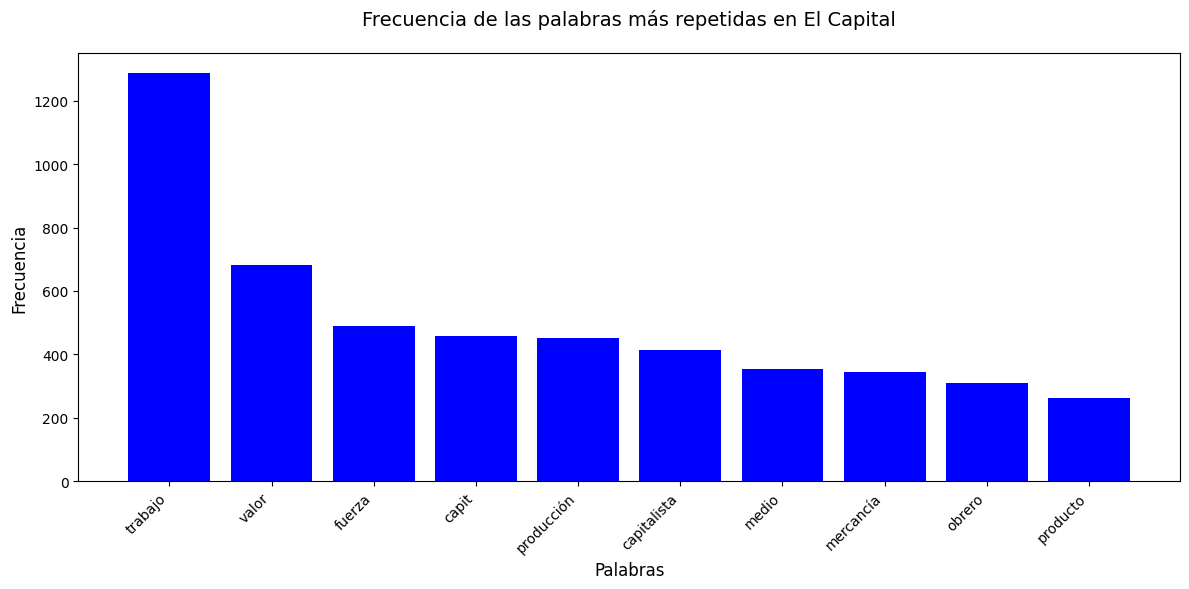

In [22]:
import matplotlib.pyplot as plt
df = df_frecuency.head(10)
plt.figure(figsize=(12, 6))
plt.bar(df['Word'], df['Frequency'], color='blue')
plt.title('Frecuencia de las palabras más repetidas en El Capital',
            fontsize=14, pad=20)
plt.xlabel('Palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

In [23]:
from wordcloud import WordCloud

In [24]:
wordcloud = WordCloud().generate(' '.join(tokens))

(-0.5, 399.5, 199.5, -0.5)

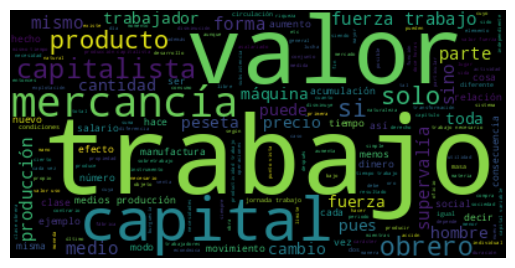

In [25]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [38]:
def generate_ngrams(text, n):
    from nltk import ngrams
    import networkx as nx
    lsita_bigramas = list(ngrams(text.split(), n))

    G = nx.DiGraph()

    for gram in lsita_bigramas:
        G.add_edge(gram[0], gram[1])

    plt.figure(figsize=(10, 6))
    nx.draw(G, with_labels=True, node_size=3000, font_size=14)
    plt.title("Grafo de Bigramas")
    plt.show()

In [33]:
frases = filter_libro[215:225]

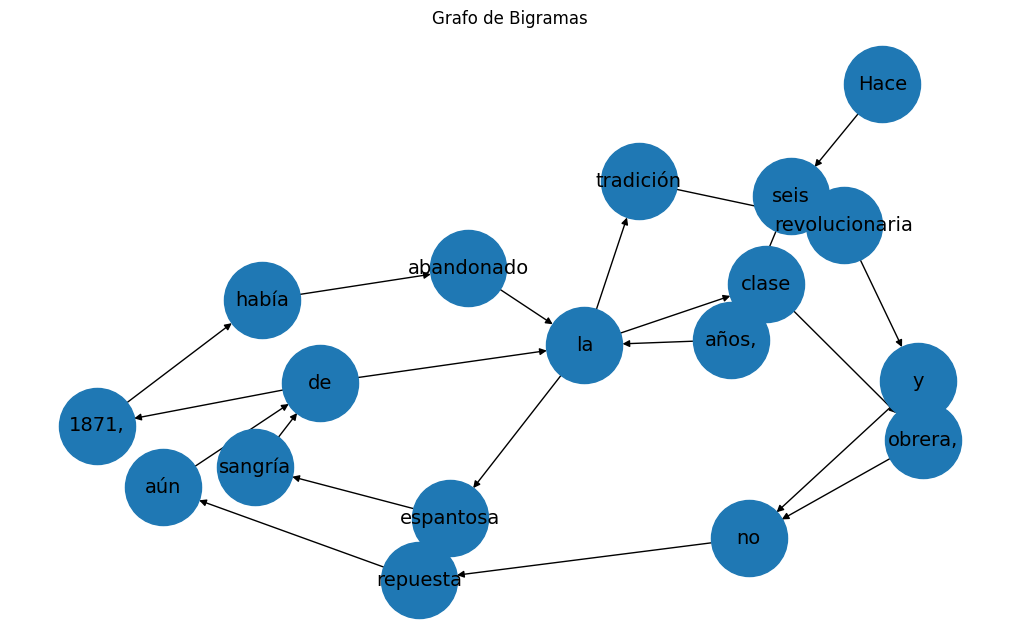

In [41]:
generate_ngrams(' '.join(frases[:2]), 2)